<a href="https://colab.research.google.com/github/aninbangkit/ML_Sehat-Mentalku/blob/main/Sehat_Mentalku_Draft_(Blm_Pakai_Data_Set).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [7]:
from google.colab import files
uploaded = files.upload()

Saving keys - Sheet1.csv to keys - Sheet1.csv


In [8]:
log = pd.read_csv("keys - Sheet1.csv")


In [9]:
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [10]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
authenticate.set_access_token(accessToken, accessTokenSecret) 
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [40]:
posts = api.user_timeline(screen_name="tim_cook", count = 100, lang ="en", tweet_mode="extended")


In [41]:
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


Show the 5 recent tweets:

1) Today we remember and honor the brave women and men, and the families they left behind, who made the ultimate sacrifice to protect this nation. To simply say we are thankful will never be enough — we are forever indebted to you. #MemorialDay

2) Roma, ci siamo! Apple Via del Corso pays homage to Rome's rich history of culture and art. We’re so thankful our customers can experience this breathtaking new store in one of Rome’s most vibrant areas! https://t.co/H6iWCgPpce

3) 20 years ago today, we opened our first Apple retail stores. Each time I visit one of our stores around the world, I feel the special energy of our teams, the creativity of our customers and how our products empower them to change the world. Here’s to the next 20 years! https://t.co/d0xhGyI3Tt

4) We believe everyone should have the tools they need to change the world. Accessibility is a fundamental right, and we’re always pushing the boundaries of innovation so that everyone can learn, c

In [42]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Today we remember and honor the brave women an...
1,"Roma, ci siamo! Apple Via del Corso pays homag..."
2,"20 years ago today, we opened our first Apple ..."
3,We believe everyone should have the tools they...
4,"Black, Brown and transgender activists have al..."


In [43]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) 
 text = re.sub('#', '', text) 
 text = re.sub('RT[\s]+', '', text) 
 text = re.sub('https?:\/\/\S+', '', text) 
 
 return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df.head()

,Tweets
0,Today we remember and honor the brave women an...
1,"Roma, ci siamo! Apple Via del Corso pays homag..."
2,"20 years ago today, we opened our first Apple ..."
3,We believe everyone should have the tools they...
4,"Black, Brown and transgender activists have al..."


In [44]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [45]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [46]:
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [47]:
df

,Tweets,Subjectivity,Polarity
0,Today we remember and honor the brave women an...,0.592857,0.066667
1,"Roma, ci siamo! Apple Via del Corso pays homag...",0.607576,0.443939
2,"20 years ago today, we opened our first Apple ...",0.301587,0.202381
3,We believe everyone should have the tools they...,0.495130,0.211039
4,"Black, Brown and transgender activists have al...",0.443939,-0.015152
...,...,...,...
95,We created the Health app because we believe e...,0.711667,0.526667
96,“A great soul never dies. It brings us togethe...,0.750000,0.800000
97,"As Grace Hopper said, “The most dangerous phra...",0.800000,-0.033333
98,The time for ClimateAction is now. Apple is pr...,0.812500,0.400000


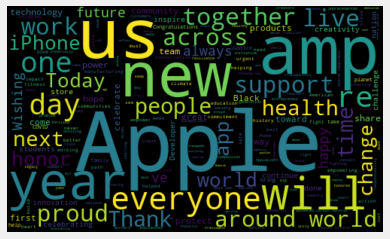

In [48]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Today we remember and honor the brave women an...,0.592857,0.066667,Positive
1,"Roma, ci siamo! Apple Via del Corso pays homag...",0.607576,0.443939,Positive
2,"20 years ago today, we opened our first Apple ...",0.301587,0.202381,Positive
3,We believe everyone should have the tools they...,0.495130,0.211039,Positive
4,"Black, Brown and transgender activists have al...",0.443939,-0.015152,Negative
...,...,...,...,...
95,We created the Health app because we believe e...,0.711667,0.526667,Positive
96,“A great soul never dies. It brings us togethe...,0.750000,0.800000,Positive
97,"As Grace Hopper said, “The most dangerous phra...",0.800000,-0.033333,Negative
98,The time for ClimateAction is now. Apple is pr...,0.812500,0.400000,Positive


In [50]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Today we remember and honor the brave women and men, and the families they left behind, who made the ultimate sacrifice to protect this nation. To simply say we are thankful will never be enough — we are forever indebted to you. MemorialDay

2) Roma, ci siamo! Apple Via del Corso pays homage to Rome's rich history of culture and art. We’re so thankful our customers can experience this breathtaking new store in one of Rome’s most vibrant areas! 

3) 20 years ago today, we opened our first Apple retail stores. Each time I visit one of our stores around the world, I feel the special energy of our teams, the creativity of our customers and how our products empower them to change the world. Here’s to the next 20 years! 

4) We believe everyone should have the tools they need to change the world. Accessibility is a fundamental right, and we’re always pushing the boundaries of innovation so that everyone can learn, create and connect in new ways. GAAD 

5) To eve

In [51]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Black, Brown and transgender activists have always been at the heart of the LGBTQ+ movement. The new Apple Watch Pride Edition Braided Solo Loop honors their legacy and reaffirms Apple's commitment to support the ongoing work toward equality. 

2) Amid a devastating rise of COVID cases in India, our thoughts are with the medical workers, our Apple family and everyone there who is fighting through this awful stage of the pandemic. Apple will be donating to support and relief efforts on the ground.

3) Today’s verdict was just, but as Dr. King wrote: “Justice for Black people will not flow into society merely from court decisions nor from fountains of political oratory...Justice for Black people cannot be achieved without radical changes in the structure of our society.”

4) The horrific violence against the Asian community, as evidenced by Tuesday’s murders in Georgia, calls us all to speak up and take action. We grieve for those lost and stand firmly with 

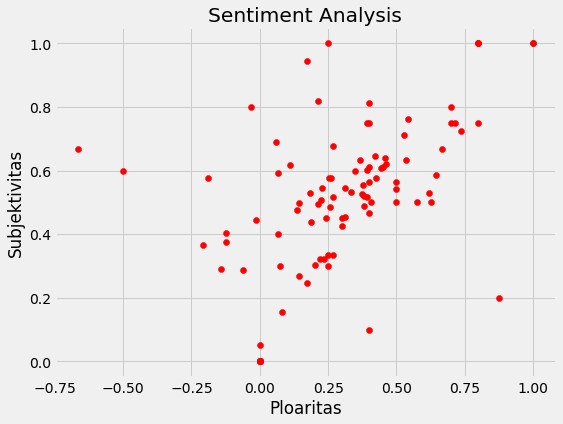

In [52]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Red') 

plt.title('Sentiment Analysis') 
plt.xlabel('Ploaritas') 
plt.ylabel('Subjektivitas') 
plt.show()

In [53]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

79.0

In [54]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

10.0

In [55]:
df['Analysis'].value_counts()

Positive    79
Neutral     11
Negative    10
Name: Analysis, dtype: int64

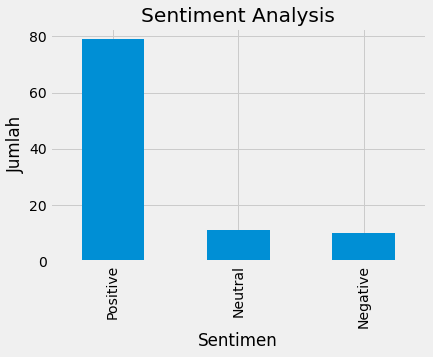

In [56]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
